In [54]:
# Data Preparation:
# Load the dataset.
# Check for missing values and handle them if necessary.
# Set the 'Year' and 'Month' columns as the datetime index.

/Users/prajwalsv/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/prajwalsv/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/prajwalsv/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19342D+01    |proj g|=  4.41055D+01

At iterate    5    f=  1.04393D+01    |proj g|=  1.66602D-01

At iterate   10    f=  1.04307D+01    |proj g|=  1.56195D-02

At iterate   15    f=  1.04121D+01    |proj g|=  3.78359D-02

At iterate   20    f=  1.04117D+01    |proj g|=  1.73846D-02

At iterate   25    f=  1.04115D+01    |proj g|=  5.33730D-03

At iterate   30    f=  1.04114D+01    |proj g|=  4.56222D-02

At iterate   35    f=  1.04101D+01    |proj g|=  1.86718D-02

At iterate   40    f=  1.04090D+01    |proj g|=  2.43175D-03

At iterate   45    f=  1.04082D+01    |proj g|=  2.70424D-02

At iterate   50    f=  1.04074D+01    |proj g|=  8.01621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/prajwalsv/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 233146.3368787938


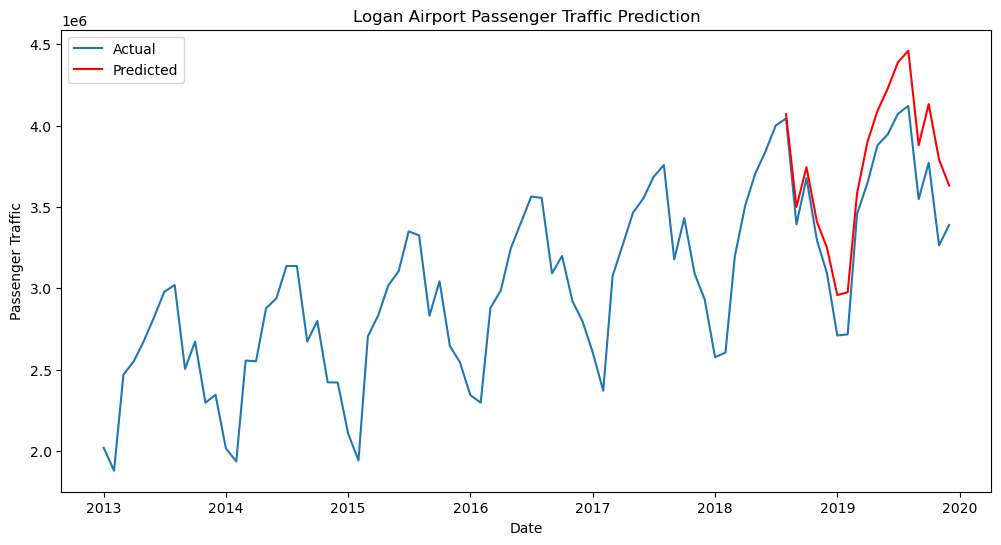

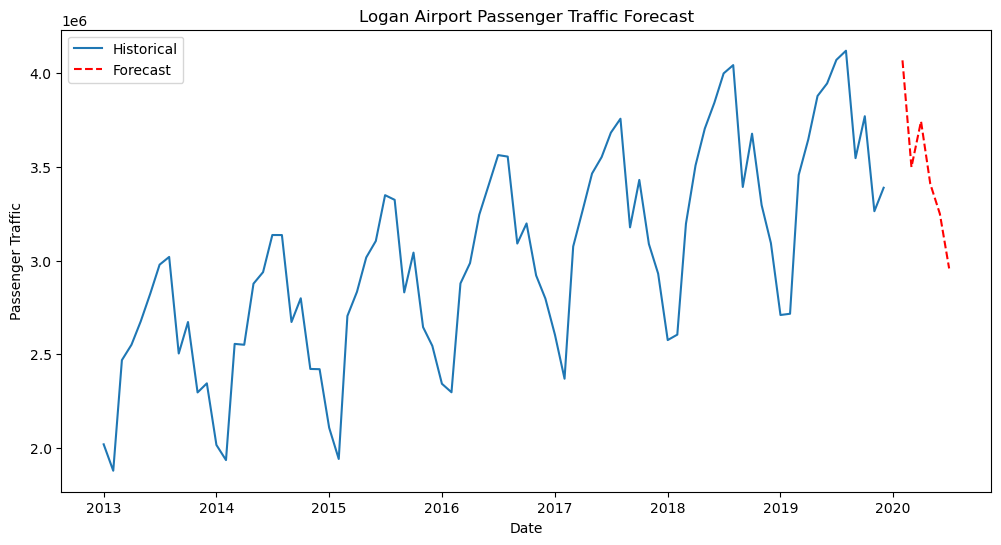

In [55]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


data = pd.read_csv('/Data.csv', encoding='latin-1') 

df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set the datetime index
df.set_index('Date', inplace=True)

# Time Series Decomposition:
# Decompose the time series into trend, seasonality, and residual components.


# Decompose time series
decomposition = seasonal_decompose(df['logan_passengers'], model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Train-Test Split:
# Split the dataset into training and testing sets.
# Assuming you want to predict the next 6 months
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]
# Model Training:
# Train the SARIMA model using the training set.
# Fit SARIMA model
order = (1, 1, 1)  # Example order - you may need to tune this
seasonal_order = (1, 1, 1, 12)  # Example seasonal order
model = SARIMAX(train['logan_passengers'], order=order, seasonal_order=seasonal_order)
result = model.fit()
# Model Evaluation:
# Evaluate the model on the testing set.
# Predict using the fitted model
forecast = result.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Evaluate the model
mae = abs(predicted_values - test['logan_passengers']).mean()
print(f'Mean Absolute Error (MAE): {mae}')
# Visualization:
# Visualize the actual vs. predicted values.

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['logan_passengers'], label='Actual')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Logan Airport Passenger Traffic Prediction')
plt.xlabel('Date')
plt.ylabel('Passenger Traffic')
plt.legend()
plt.show()
# Forecasting:
# Forecast future values beyond the available data.
# Forecast the next 6 months
forecast_steps = 6
forecast = result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['logan_passengers'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linestyle='--')
plt.title('Logan Airport Passenger Traffic Forecast')
plt.xlabel('Date')
plt.ylabel('Passenger Traffic')
plt.legend()
plt.show()

In [15]:
# keep in mind that the model parameters (order and seasonal_order) in this example are just placeholders. 
# You may need to perform hyperparameter tuning to find the optimal values for your specific dataset. 
# Additionally, this example assumes a univariate time series; if you have additional features,
# you might explore more complex models like SARIMAX or machine learning models.

In [19]:
#Problem Statement 2: Forecasting Hotel Occupancy Rate

Epoch 1/50
2/2 [==============================] - 1s 227ms/step - loss: 0.5771 - val_loss: 0.5445
Epoch 2/50
2/2 [==============================] - 0s 24ms/step - loss: 0.5611 - val_loss: 0.5307
Epoch 3/50
2/2 [==============================] - 0s 25ms/step - loss: 0.5463 - val_loss: 0.5174
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 0.5307 - val_loss: 0.5040
Epoch 5/50
2/2 [==============================] - 0s 24ms/step - loss: 0.5153 - val_loss: 0.4904
Epoch 6/50
2/2 [==============================] - 0s 23ms/step - loss: 0.5006 - val_loss: 0.4765
Epoch 7/50
2/2 [==============================] - 0s 23ms/step - loss: 0.4850 - val_loss: 0.4624
Epoch 8/50
2/2 [==============================] - 0s 23ms/step - loss: 0.4697 - val_loss: 0.4483
Epoch 9/50
2/2 [==============================] - 0s 25ms/step - loss: 0.4538 - val_loss: 0.4339
Epoch 10/50
2/2 [==============================] - 0s 31ms/step - loss: 0.4374 - val_loss: 0.4195
Epoch 11/50
2/2 [===========

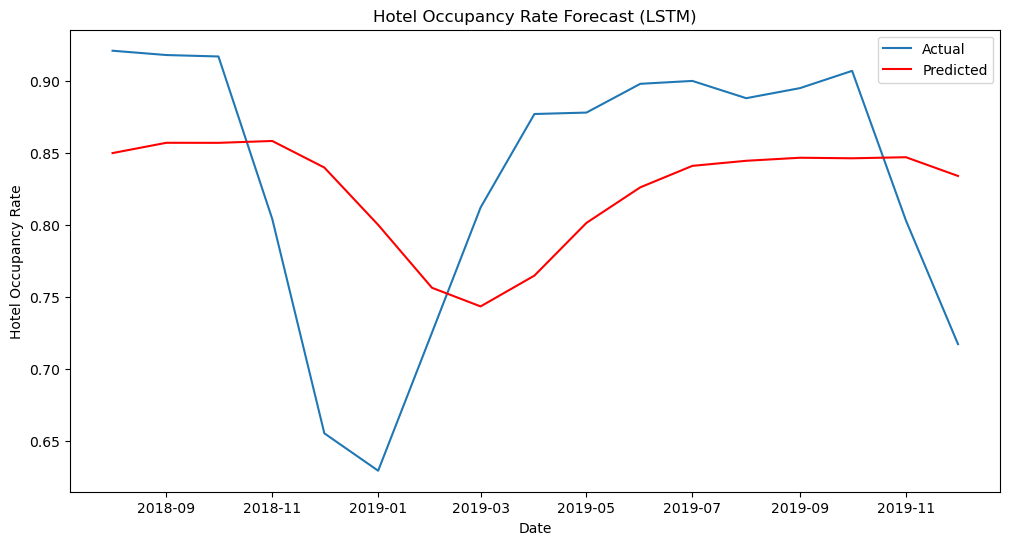

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Feature Scaling
scaler = MinMaxScaler()
df['hotel_occup_rate_scaled'] = scaler.fit_transform(df[['hotel_occup_rate']])

# Choose a sequence length (e.g., 3 months)
sequence_length = 3

# Create sequences and targets
def create_sequences(data, seq_length):
    sequences = []
    targets = []

    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length]
        target = data.iloc[i + seq_length]['hotel_occup_rate_scaled']
        sequences.append(seq.values)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Create sequences and targets
X, y = create_sequences(df[['hotel_occup_rate_scaled']], sequence_length)

# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Model Evaluation
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions to get actual values
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics (e.g., Mean Absolute Error)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f'Mean Absolute Error (MAE): {mae}')

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label='Actual')
plt.plot(df.index[-len(y_test_actual):], y_pred_actual, label='Predicted', color='red')
plt.title('Hotel Occupancy Rate Forecast (LSTM)')
plt.xlabel('Date')
plt.ylabel('Hotel Occupancy Rate')
plt.legend()
plt.show()


Best: -0.088787 using {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error (MAE): 0.029187058823529455


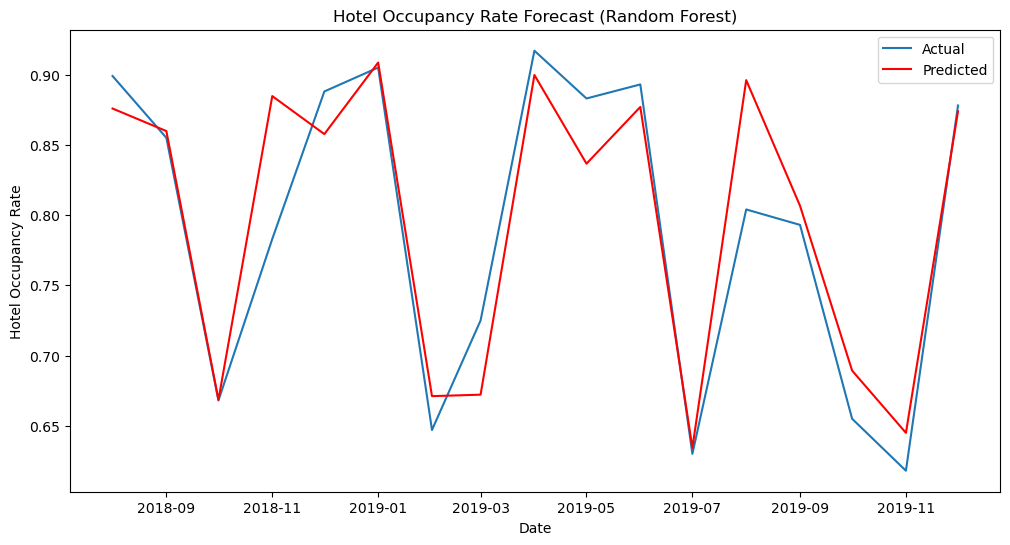

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


data = pd.read_csv('Data.csv', encoding='latin-1') 

df = pd.DataFrame(data)



# Convert 'Year' and 'Month' to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set the datetime index
df.set_index('Date', inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
df['hotel_occup_rate_scaled'] = scaler.fit_transform(df[['hotel_occup_rate']])

# Choose a sequence length (e.g., 3 months)
sequence_length = 3

# Create sequences and targets
def create_sequences(data, seq_length):
    sequences = []
    targets = []

    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length]
        target = data.iloc[i + seq_length]['hotel_occup_rate_scaled']
        sequences.append(seq.values)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Create sequences and targets
X, y = create_sequences(df[['hotel_occup_rate_scaled']], sequence_length)

# Check if there's enough data for training and testing
if len(X) <= 1:
    raise ValueError("Not enough data for training and testing. Please add more data.")

# Adjust test size to ensure there's enough data
test_size = min(0.2, len(X) - 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_result = grid.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse transform the scaled predictions to get actual values
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics (e.g., Mean Absolute Error)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f'Mean Absolute Error (MAE): {mae}')

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label='Actual')
plt.plot(df.index[-len(y_test_actual):], y_pred_actual, label='Predicted', color='red')
plt.title('Hotel Occupancy Rate Forecast (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Hotel Occupancy Rate')
plt.legend()
plt.show()


1/1 [==============================] - 0s 84ms/step
Mean Absolute Error (MAE): 269.6429036458333


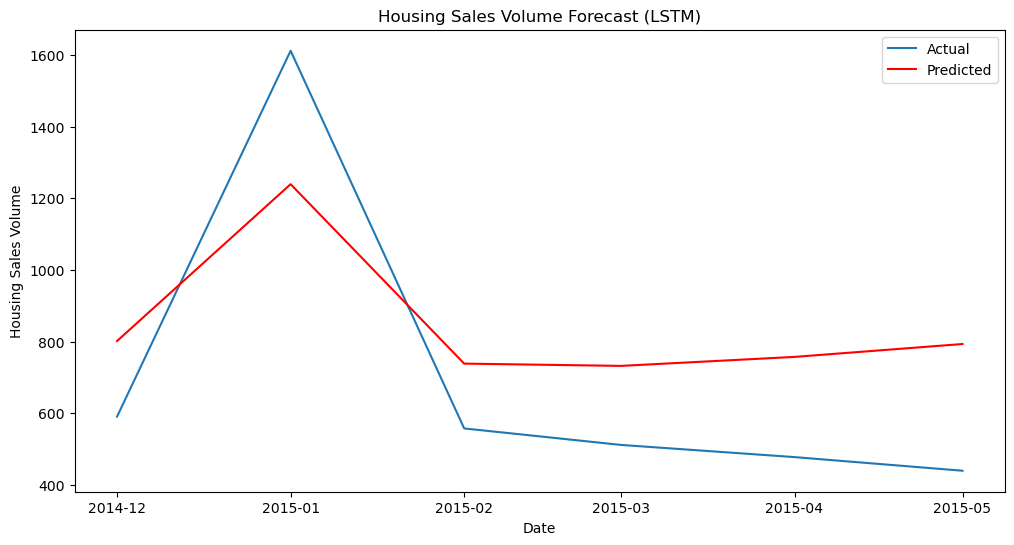

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from pmdarima import auto_arima

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


data = pd.read_csv('Data.csv', encoding='latin-1') 

df = pd.DataFrame(data)

# Convert 'Year' and 'Month' to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Set the datetime index
df.set_index('Date', inplace=True)


df=df.head(29)


# Feature Scaling
scaler = MinMaxScaler()
df['housing_sales_vol_scaled'] = scaler.fit_transform(df[['housing_sales_vol']])

# Choose a sequence length (e.g., 3 months)
sequence_length = 3

# Create sequences and targets
def create_sequences(data, seq_length):
    sequences = []
    targets = []

    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length]
        target = data.iloc[i + seq_length]['housing_sales_vol_scaled']
        sequences.append(seq.values)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Create sequences and targets
X, y = create_sequences(df[['housing_sales_vol_scaled']], sequence_length)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions to get actual values
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics (e.g., Mean Absolute Error)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f'Mean Absolute Error (MAE): {mae}')

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label='Actual')
plt.plot(df.index[-len(y_test_actual):], y_pred_actual, label='Predicted', color='red')
plt.title('Housing Sales Volume Forecast (LSTM)')
plt.xlabel('Date')
plt.ylabel('Housing Sales Volume')
plt.legend()
plt.show()


Best: -0.198558 using {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Absolute Error (MAE): 129.21999999999994


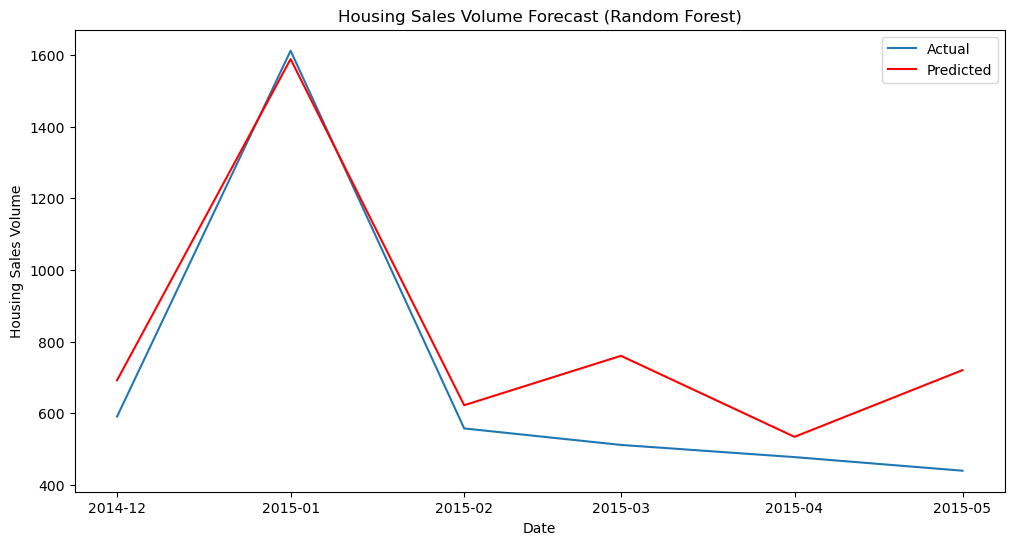

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



# Feature Scaling
scaler = MinMaxScaler()
df['housing_sales_vol_scaled'] = scaler.fit_transform(df[['housing_sales_vol']])

# Choose a sequence length (e.g., 3 months)
sequence_length = 3

# Create sequences and targets
def create_sequences(data, seq_length):
    sequences = []
    targets = []

    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length]
        target = data.iloc[i + seq_length]['housing_sales_vol_scaled']
        sequences.append(seq.values)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Create sequences and targets
X, y = create_sequences(df[['housing_sales_vol_scaled']], sequence_length)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_result = grid.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test.reshape(X_test.shape[0], -1))

# Inverse transform the scaled predictions to get actual values
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics (e.g., Mean Absolute Error)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f'Mean Absolute Error (MAE): {mae}')

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_actual):], y_test_actual, label='Actual')
plt.plot(df.index[-len(y_test_actual):], y_pred_actual, label='Predicted', color='red')
plt.title('Housing Sales Volume Forecast (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Housing Sales Volume')
plt.legend()
plt.show()
